In [686]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.metrics import roc_auc_score
from sklearn.metrics import average_precision_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import confusion_matrix
from imblearn.under_sampling import RandomUnderSampler
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn.model_selection import train_test_split

In [687]:
df=pd.read_csv('breast-cancer.csv')

In [688]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [689]:
df['diagnosis'].value_counts()

diagnosis
B    357
M    212
Name: count, dtype: int64

In [690]:
#encode the categorical data
df['diagnosis']=df['diagnosis'].map({'M':1,'B':0})

df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [691]:
df['diagnosis'].unique()
df['diagnosis'].value_counts()

diagnosis
0    357
1    212
Name: count, dtype: int64

In [692]:
y=df['diagnosis']
y.unique()
y.value_counts()

diagnosis
0    357
1    212
Name: count, dtype: int64

In [693]:
X=df.drop(['diagnosis','id'],axis=1)
X.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [694]:
print(X.shape)
print(y.shape)

(569, 30)
(569,)


In [695]:
#preserve the column names of x_train
col=X.columns

In [696]:
#standardize the data
scaler = StandardScaler()
X=scaler.fit_transform(X)

In [697]:
#create a dataframe
X=pd.DataFrame(X,columns=col)

X.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,...,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,...,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,...,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,...,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,...,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100


In [698]:
#remove the index column
X=X.iloc[:,1:-1]

In [699]:
X.shape

(569, 28)

In [700]:
#correlation matrix

corrmat = X.corr()

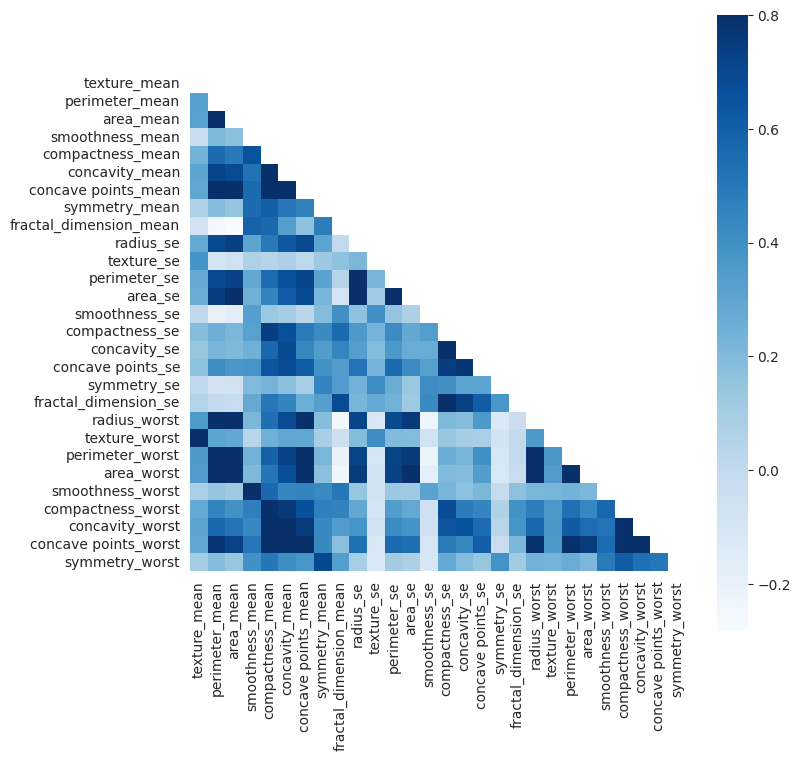

In [701]:
#plot only the lower triangle of the heatmap
mask = np.zeros_like(corrmat)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(8, 8))
    ax = sns.heatmap(corrmat, mask=mask, vmax= .8, square=True, cmap='Blues')

In [702]:
#create a function to identify the highly correlated features and set threshold to 0.9
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            # we are interested in absolute coeff value
            if abs(corr_matrix.iloc[i, j]) > threshold:
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [703]:
#call the function correlation
corr_features = correlation(X, 0.9)

In [704]:
#drop the correlated features
X.drop(labels=corr_features, axis=1, inplace=True)

In [705]:
#check the shape of x_train
X.shape

(569, 19)

In [706]:
X.head()

,texture_mean,perimeter_mean,smoothness_mean,compactness_mean,concavity_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,smoothness_worst,compactness_worst,concavity_worst,symmetry_worst
0,-2.073335,1.269934,1.568466,3.283515,2.652874,2.217515,2.255747,2.489734,-0.565265,-0.214002,1.316862,0.724026,0.660820,1.148757,0.907083,1.307686,2.616665,2.109526,2.750622
1,-0.353632,1.685955,-0.826962,-0.487072,-0.023846,0.001392,-0.868652,0.499255,-0.876244,-0.605351,-0.692926,-0.440780,0.260162,-0.805450,-0.099444,-0.375612,-0.430444,-0.146749,-0.243890
2,0.456187,1.566503,0.942210,1.052926,1.363478,0.939685,-0.398008,1.228676,-0.780083,-0.297005,0.814974,0.213076,1.424827,0.237036,0.293559,0.527407,1.082932,0.854974,1.152255
3,0.253732,-0.592687,3.283553,3.402909,1.915897,2.867383,4.910919,0.326373,-0.110409,0.689702,2.744280,0.819518,1.115007,4.732680,2.047511,3.394275,3.893397,1.989588,6.046041
4,-1.151816,1.776573,0.280372,0.539340,1.371011,-0.009560,-0.562450,1.270543,-0.790244,1.483067,-0.048520,0.828471,1.144205,-0.361092,0.499328,0.220556,-0.313395,0.613179,-0.868353


In [707]:
#select feature based on p-value

import statsmodels.api as sm

#add a constant to get an intercept
X_1=sm.add_constant(X)

#create a first fitted model
model=sm.OLS(y,X_1).fit()

#check p-value for each feature using summary
model.pvalues


const                     2.336491e-144
texture_mean               1.116872e-05
perimeter_mean             2.072277e-06
smoothness_mean            8.735002e-01
compactness_mean           1.925377e-02
concavity_mean             3.345374e-02
symmetry_mean              2.785429e-01
fractal_dimension_mean     5.041101e-01
radius_se                  1.711672e-03
texture_se                 3.315934e-01
smoothness_se              2.892662e-01
compactness_se             1.427977e-01
concavity_se               6.751219e-07
concave points_se          3.374142e-08
symmetry_se                2.434986e-01
fractal_dimension_se       3.386255e-02
smoothness_worst           6.018454e-02
compactness_worst          4.024839e-01
concavity_worst            6.068776e-03
symmetry_worst             1.635888e-04
dtype: float64

In [708]:
#select the features with p-value less than 0.05
cols=list(X.columns)
pmax=1
while (len(cols)>0):
    p=[]
    X_1=X[cols]
    X_1=sm.add_constant(X_1)
    model=sm.OLS(y,X_1).fit()
    p=pd.Series(model.pvalues.values[1:],index=cols)
    pmax=max(p)
    feature_with_p_max=p.idxmax()
    if(pmax>0.05):
        cols.remove(feature_with_p_max)
    else:
        break
selected_features_BE=cols
print(selected_features_BE)

['texture_mean', 'perimeter_mean', 'compactness_mean', 'concavity_mean', 'radius_se', 'concavity_se', 'concave points_se', 'fractal_dimension_se', 'smoothness_worst', 'concavity_worst', 'symmetry_worst']


In [709]:
#select the final columns
X=X[selected_features_BE]
X.head()

,texture_mean,perimeter_mean,compactness_mean,concavity_mean,radius_se,concavity_se,concave points_se,fractal_dimension_se,smoothness_worst,concavity_worst,symmetry_worst
0,-2.073335,1.269934,3.283515,2.652874,2.489734,0.724026,0.660820,0.907083,1.307686,2.109526,2.750622
1,-0.353632,1.685955,-0.487072,-0.023846,0.499255,-0.440780,0.260162,-0.099444,-0.375612,-0.146749,-0.243890
2,0.456187,1.566503,1.052926,1.363478,1.228676,0.213076,1.424827,0.293559,0.527407,0.854974,1.152255
3,0.253732,-0.592687,3.402909,1.915897,0.326373,0.819518,1.115007,2.047511,3.394275,1.989588,6.046041
4,-1.151816,1.776573,0.539340,1.371011,1.270543,0.828471,1.144205,0.499328,0.220556,0.613179,-0.868353


In [710]:
y.unique()

array([1, 0])

In [711]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [712]:
#train isolation forest with the x_train
model=IsolationForest( max_samples=256, contamination=0.05,random_state=42, n_jobs=-1)
model.fit(X_train)

IsolationForest(contamination=0.05, max_samples=256, n_jobs=-1, random_state=42)

In [713]:
y_pred=model.predict(X_test)

In [714]:
np.unique(y_pred)

array([-1,  1])

In [715]:
#map class -1 to 1 and 1 to 0
y_pred=np.where(y_pred==-1,1,0)

np.unique(y_pred)

array([0, 1])

In [716]:
# Calculate the accuracy score
accuracy_score = roc_auc_score(y_test, y_pred)

In [717]:
# Print the accuracy score
print("Accuracy score: {}".format(accuracy_score))

Accuracy score: 0.5465116279069767


In [718]:
#find the f1 score
from sklearn.metrics import f1_score
f1_score(y_test,y_pred)


0.1702127659574468

In [719]:
# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)


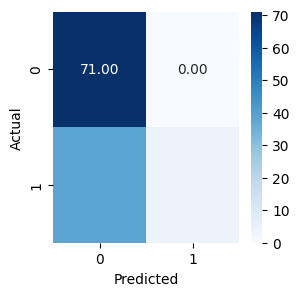

In [720]:
# Plot the confusion matrix
plt.figure(figsize=(3, 3))
sns.heatmap(cm, annot=True, fmt='.2f',cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [721]:
from sklearn.metrics import precision_score, recall_score
# Compute the precision and recall for each class
precision = precision_score(y_test, y_pred, average=None)
recall = recall_score(y_test, y_pred, average=None)

# Create a table to display the precision and recall for each class
table = pd.DataFrame({'Precision': precision, 'Recall': recall}, index=['Benign', 'Malignant'])
print(table)

           Precision    Recall
Benign      0.645455  1.000000
Malignant   1.000000  0.093023


In [722]:
from imblearn.over_sampling import SMOTE
from collections import Counter

counter= Counter(y_train)
print('Before',counter)
# Create an instance of the SMOTE class
smote = SMOTE(random_state=42)

# Apply SMOTE to the training data
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

counter= Counter(y_resampled)
print('After',counter)


Before Counter({0: 286, 1: 169})
After Counter({0: 286, 1: 286})


In [723]:
# #oversample using SMOTE and ENN
# from imblearn.combine import SMOTEENN

# counter= Counter(y_train)
# print('Before',counter)
# # Create an instance of the SMOTEENN class
# smote_enn = SMOTEENN(random_state=42)
# X_resampled, y_resampled = smote_enn.fit_resample(X_train, y_train)

# counter= Counter(y_resampled)
# print('After',counter)

In [724]:
#train isolation forest with the x_train
model=IsolationForest( max_samples=256, contamination=0.05,random_state=42, n_jobs=-1)
model.fit(X_resampled)

IsolationForest(contamination=0.05, max_samples=256, n_jobs=-1, random_state=42)

In [725]:
y_pred=model.predict(X_test)

In [726]:
#map class -1 to 1 and 1 to 0
y_pred=np.where(y_pred==-1,1,0)

np.unique(y_pred)

array([0, 1])

In [727]:
# Calculate the accuracy score
accuracy_score = roc_auc_score(y_test, y_pred)

# Print the accuracy score
print("Accuracy score: {}".format(accuracy_score))

Accuracy score: 0.5465116279069767


In [728]:
#find the f1 score
from sklearn.metrics import f1_score
f1_score(y_test,y_pred)


0.1702127659574468

In [729]:
from sklearn.metrics import precision_score, recall_score

# Compute the precision and recall for each class
precision = precision_score(y_test, y_pred, average=None)
recall = recall_score(y_test, y_pred, average=None)

# Create a table to display the precision and recall for each class
table = pd.DataFrame({'Precision': precision, 'Recall': recall}, index=['Benign', 'Malignant'])
print(table)

           Precision    Recall
Benign      0.645455  1.000000
Malignant   1.000000  0.093023


In [730]:
#give a precision, recall, F1 score and accuracy of the model
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))


              precision    recall  f1-score   support

           0       0.65      1.00      0.78        71
           1       1.00      0.09      0.17        43

    accuracy                           0.66       114
   macro avg       0.82      0.55      0.48       114
weighted avg       0.78      0.66      0.55       114



In [776]:
#use undersampling to balance the data

from imblearn.under_sampling import RandomUnderSampler

# define the undersampling strategy
undersample = RandomUnderSampler(sampling_strategy='majority')

# fit and apply the transform
X_train_resampled, y_train_resampled = undersample.fit_resample(X_train, y_train)


In [777]:
#train isolation forest with the x_train_resampled
model=IsolationForest( max_samples=256, contamination=0.05,random_state=42, n_jobs=-1)
model.fit(X_train_resampled)

IsolationForest(contamination=0.05, max_samples=256, n_jobs=-1, random_state=42)

In [778]:
#predict the x_test
y_pred=model.predict(X_test)

In [779]:
#map class -1 to 1 and 1 to 0
y_pred=np.where(y_pred==-1,1,0)

np.unique(y_pred)

array([0, 1])

In [780]:
#give a precision, recall, F1 score and accuracy of the model
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.64      0.99      0.78        71
           1       0.80      0.09      0.17        43

    accuracy                           0.65       114
   macro avg       0.72      0.54      0.47       114
weighted avg       0.70      0.65      0.55       114



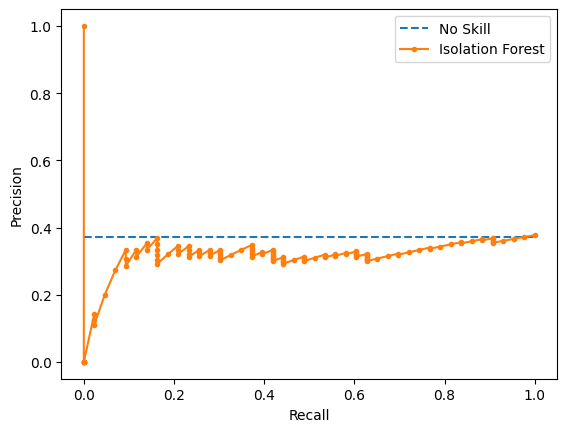

In [781]:
#plot area under precision recall curve
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc
from matplotlib import pyplot

# predict probabilities
yhat = model.decision_function(X_test)
# retrieve just the probabilities for the positive class
pos_probs = yhat
# calculate the no skill line as the proportion of the positive class
no_skill = len(y[y==1]) / len(y)
# plot the no skill precision-recall curve
pyplot.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
# calculate model precision-recall curve
precision, recall, _ = precision_recall_curve(y_test, pos_probs)
# plot the model precision-recall curve
pyplot.plot(recall, precision, marker='.', label='Isolation Forest')
# axis labels
pyplot.xlabel('Recall')
pyplot.ylabel('Precision')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()
